# <center>LEAD SCORE<center>

## 1. Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 2. Read the data files

In [3]:
lead_score=pd.read_csv("Leads.csv")
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_score.shape

(9240, 37)

In [5]:
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## 3. Data Cleaning

### 3.1 Handeling Null Values

In [7]:
100*(lead_score.isnull().sum()/len(lead_score))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
# Check for duplicates
sum(lead_score.duplicated(subset = 'Prospect ID')) == 0

True

In [9]:
sum(lead_score.duplicated(subset = 'Lead Number')) == 0

True

#### Dropping Prospect ID and Lead Number

In [10]:
lead_score.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

As these are the ID of the individual person hence we have dropped it

#### Change 'Select' to NaN

In [11]:
lead_score=lead_score.replace('Select',np.nan)

In [12]:
100*(lead_score.isnull().sum()/len(lead_score))

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

#### Dropping Columns more then 40 percent

In [13]:
cols=lead_score.columns

for i in cols:
    if((100*(lead_score[i].isnull().sum()/len(lead_score.index))) >= 40):
        lead_score.drop(i, 1, inplace = True)

Lets check with the variables which have less then 40 percent null value

In [14]:
round(100*(lead_score.isnull().sum()/len(lead_score)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

Treat Remaining null value columns
#### Note- We havent removed them as there are few columns that is necessary for analysis

In [15]:
lead_score['Country'].value_counts(dropna=False)
    

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Canada                     4
Kuwait                     4
Germany                    4
South Africa               4
Sweden                     3
Netherlands                2
Belgium                    2
Uganda                     2
Philippines                2
Italy                      2
Asia/Pacific Region        2
Ghana                      2
China                      2
Bangladesh                 2
Indonesia                  1
Russia                     1
Sri Lanka                  1
Kenya                      1
Denmark                    1
Vietnam       

In [16]:
# Repalcing the nan values

lead_score.Country=lead_score.Country.replace('NaN',"India")

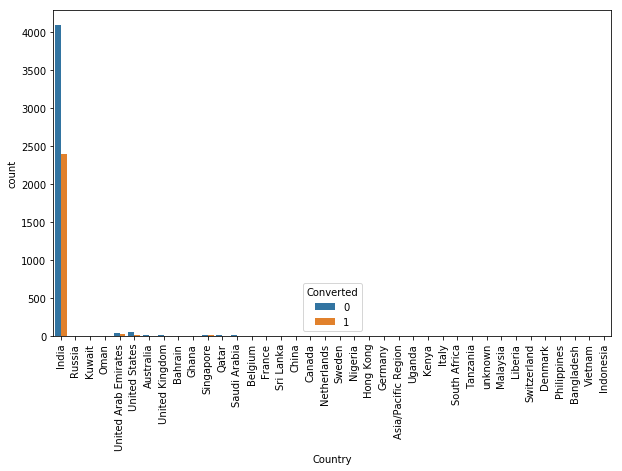

In [17]:
plt.figure(figsize=[10,6])
sns.countplot(lead_score.Country,hue=lead_score.Converted)
plt.xticks(rotation=90)
plt.show()

#### Analysis-Here we can say that India is the Country where most of the leads data we got. Also as almost max of data are from India then we can drop the variable, as with this this not that important attributes

In [18]:
lead_score.drop('Country',1,inplace= True)

In [19]:
# Specialization

lead_score.Specialization.value_counts(dropna= False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Note- As Specialization is important criteria to understand this data so we can not drop this variable.
#### Also we see that more then 35 percent missing values are there so we can convert those into "Not Specified"

In [20]:
lead_score.Specialization=lead_score.Specialization.replace(np.nan,"Not Specified")

#### As we can see that Management group is more so will bring all the manangement people in one group

In [21]:
lead_score.Specialization=lead_score.Specialization.replace(['Finance Management','Human Resource Management',
                                                             'Marketing Management','Operations Management',
                                                             'IT Projects Management','Supply Chain Management',
                                                             'Healthcare Management','Hospitality Management',
                                                             'Retail Management'],"Specialization_Management")

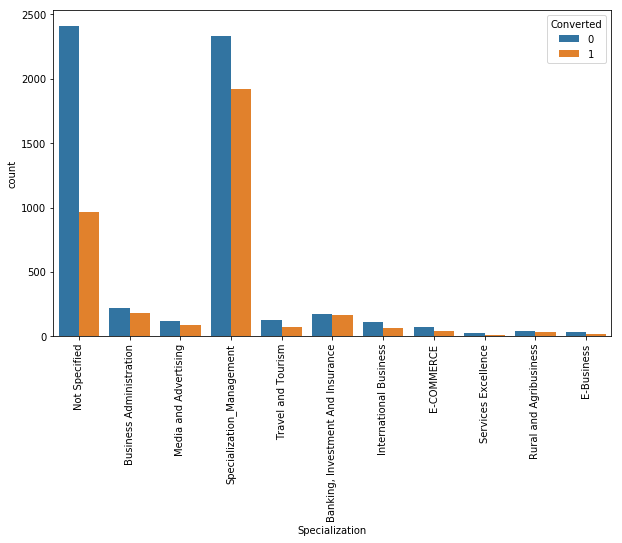

In [22]:
# Visualizatiion on Specialization

plt.figure(figsize=[10,6])
sns.countplot(lead_score.Specialization,hue=lead_score.Converted)
plt.xticks(rotation=90)
plt.show()

#### Analysis- We can say that people with having specialization in management and Not Specified groups are having the leads. Not Specified people might be the students who wants to pursue the course or people having the mangement skills are intrested to do this.

In [23]:
# What is your current occupation

lead_score['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Note- Current Occupation is one of the important variable, and we need to replace the NaN value with mode which is Unemployed

In [24]:
lead_score['What is your current occupation']=lead_score['What is your current occupation'].replace(np.nan,'Unemployed')

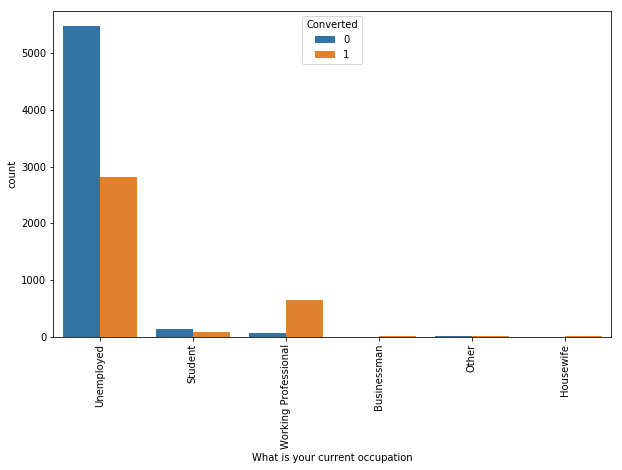

In [25]:
plt.figure(figsize=[10,6])
sns.countplot(lead_score['What is your current occupation'],hue=lead_score.Converted)
plt.xticks(rotation=90)
plt.show()

#### Analysis- The above visualization tells that most of the people who are looking for the course are unemployed and having the higher rate of converting.

In [26]:
#What matters most to you in choosing a course

lead_score['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### The above column is not giving any much insight of the data and also having 29 percent of missing values, better we can drop this

In [27]:
lead_score.drop('What matters most to you in choosing a course',1,inplace=True)

In [28]:
#Tags

lead_score.Tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

#### Note- Tag is a important variable and we cannot simply drop as this is having 35 percent of missing data, As there are multiple values we can simply give the mode value, for now we can proceed with "Not Specified"

In [29]:
lead_score.Tags=lead_score.Tags.replace(np.nan,'Not Specified')

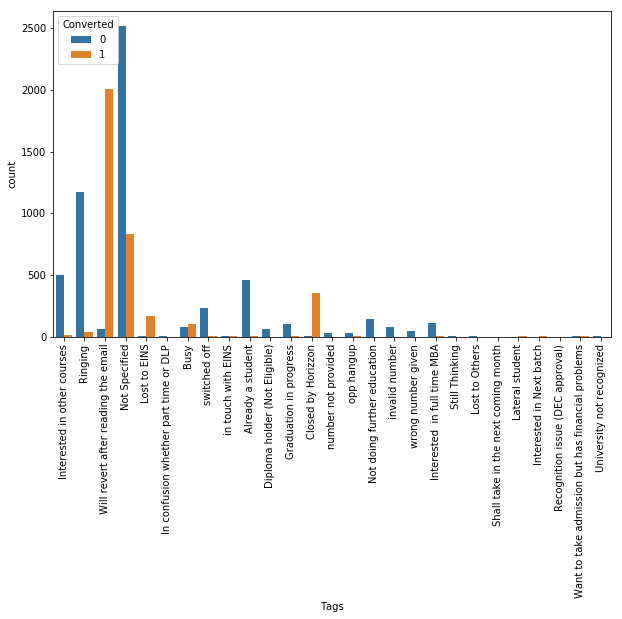

In [30]:
# Visiualizing Tags

plt.figure(figsize=[10,6])
sns.countplot(lead_score.Tags,hue=lead_score.Converted)
plt.xticks(rotation=90)
plt.show()

#### Analysis- As per the above we see that the counts of most of the values are not crossed 500. so we can group some of the values and see how it goes

In [31]:
lead_score.Tags.value_counts()

Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [32]:
lead_score['Tags'] = lead_score['Tags'].replace(['Lost to Others','Already a student','switched off','Busy','Lost to EINS','Not doing further education','Interested  in full time MBA','Graduation in progress','invalid number','wrong number given','opp hangup','number not provided','in touch with EINS','Lateral student','Diploma holder (Not Eligible)','University not recognized','Recognition issue (DEC approval)','In confusion whether part time or DLP'],'Other Tags')

In [33]:
lead_score['Tags'] = lead_score['Tags'].replace(['Interested in other courses','Want to take admission but has financial problems','Still Thinking','Interested in Next batch','Shall take in the next coming month','Closed by Horizzon'],'Positive other Tag')

In [34]:
lead_score.Tags.value_counts()

Not Specified                          3353
Will revert after reading the email    2072
Other Tags                             1722
Ringing                                1203
Positive other Tag                      890
Name: Tags, dtype: int64

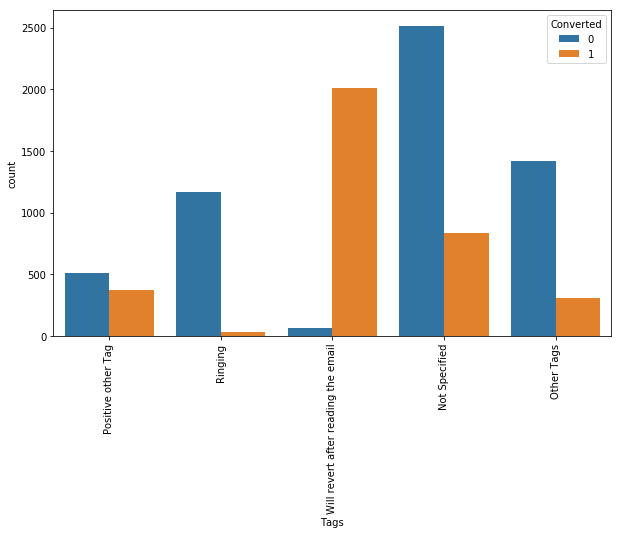

In [35]:
plt.figure(figsize=[10,6])
sns.countplot(lead_score.Tags,hue=lead_score.Converted)
plt.xticks(rotation=90)
plt.show()

#### We have binned some of the importannt values for our future analysis

In [36]:
# City

lead_score.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Will remove city from the list as dont see much insight out of it and most of the leads data are from Maharastra and missing values are also around 39 percent

In [37]:
lead_score.drop('City',1,inplace=True)

In [38]:
# Lead Source


In [39]:
lead_score['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
blog                    1
testone                 1
youtubechannel          1
WeLearn                 1
Name: Lead Source, dtype: int64

In [40]:
lead_score['Lead Source']=lead_score['Lead Source'].replace(np.nan,'Google')
lead_score['Lead Source']=lead_score['Lead Source'].replace('google','Google')
lead_score['Lead Source']=lead_score['Lead Source'].replace(['Facebook','youtubechannel'],'Social Media')
lead_score['Lead Source']=lead_score['Lead Source'].replace(['bing','Click2call','Live Chat','Press_Release','testone',
                                                             'welearnblog_Home','blog','WeLearn','NC_EDM',
                                                             'Pay per Click Ads'],'Others')

#### For our further analysis we have done some changes in the column also we have treated the null values in this column

In [41]:
# TotalVisits

lead_score['TotalVisits'].median()

3.0

In [42]:
lead_score['TotalVisits']=lead_score['TotalVisits'].replace(np.nan, 3.0)


In [43]:
#Page Views Per Visit

lead_score['Page Views Per Visit'].median()
lead_score['Page Views Per Visit']=lead_score['Page Views Per Visit'].replace(np.nan,2.0)

In [44]:
# Last Activity 

lead_score['Last Activity'].value_counts(dropna= False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [45]:
lead_score['Last Activity'].mode()
lead_score['Last Activity']=lead_score['Last Activity'].replace(np.nan,'Email Opened')
lead_score['Last Activity']=lead_score['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation',
                                                                 'Approached upfront','View in browser link Clicked',
                                                                 'Email Received','Email Marked Spam',
                                                                 'Visited Booth in Tradeshow',
                                                                 'Resubscribed to emails'],'Others')

In [46]:
lead_score['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [47]:
lead_score.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                                        0
Update me on Supply Chain Content           0
Get updates on DM Content         

In [48]:
def countplt(df):
    plt.figure(figsize=(8,5))
    s1=sns.countplot(df, hue=lead_score.Converted)
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    plt.show()

#### Finally we have the data with no null values, now will proceed with categorical and numerical variable analysis

## 4. Categorical Analysis

#### Here we will see each of the categorical variable and analyze it in depth for better understanding also we will look for outliers if any and treat them.

In [49]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
Lead Origin                                 9240 non-null object
Lead Source                                 9240 non-null object
Do Not Email                                9240 non-null object
Do Not Call                                 9240 non-null object
Converted                                   9240 non-null int64
TotalVisits                                 9240 non-null float64
Total Time Spent on Website                 9240 non-null int64
Page Views Per Visit                        9240 non-null float64
Last Activity                               9240 non-null object
Specialization                              9240 non-null object
What is your current occupation             9240 non-null object
Search                                      9240 non-null object
Magazine                                    9240 non-null object
Newspaper Article                           9240

### 4.1 Lead Origin

In [50]:
# Lead Origin

lead_score['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

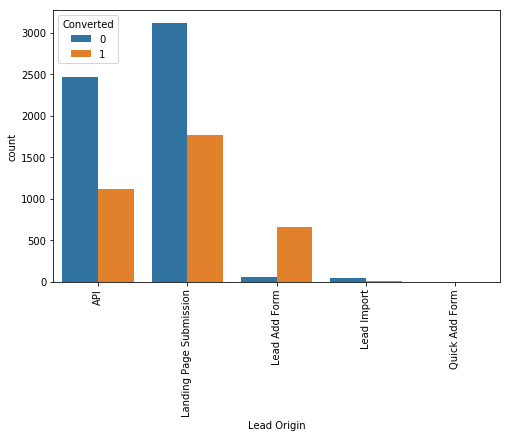

In [51]:
# Visualizing

countplt(lead_score['Lead Origin'])

#### Analysis- 
#### 1. Landing page submission and API brings high number of leads as well as conversion.

#### 2. Lead add Form is having high rate of conversion rate but counts are not so high
#### 3. Quik Add and Lead import doesnt seems to be helping much
#### 4. In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

### 4.2 Lead Source

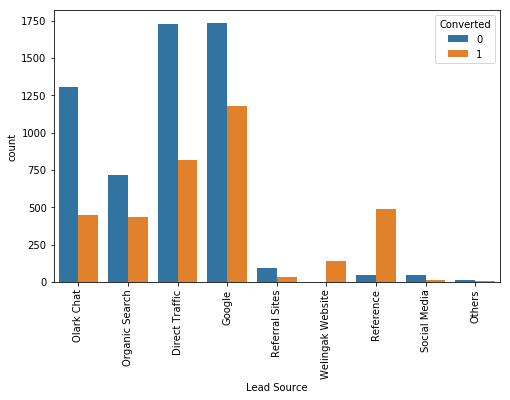

In [52]:
countplt(lead_score['Lead Source'])

#### Analysis-

#### 1. Direct Traffic, Google and Olark Chat is contributing more to get leads
#### 2. converting ratio is also good for leads in Google
#### 3. To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

### 4.3 Do Not Email


In [53]:
lead_score['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

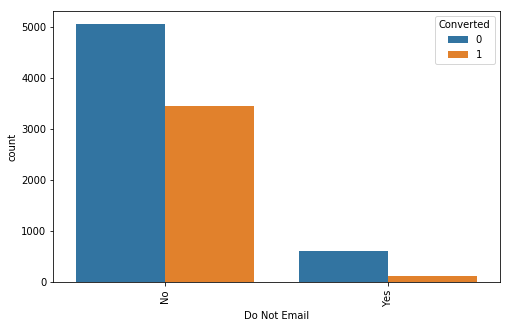

In [54]:
countplt(lead_score['Do Not Email'])

#### Analysis- 
#### 1. Most of the user who opted for not to be mailed are the most of leads and the conversion is also high

### 4.4 Do Not Call

In [55]:
lead_score['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

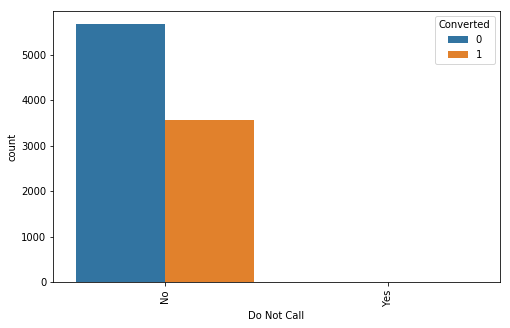

In [56]:
countplt(lead_score['Do Not Call'])

#### Analysis-
#### Leads are opted for not to be called are the higher conversion leads

#### Note- here the data is imbalance and in such case if we proceed with model buiding our model can be biased, will put all such variables in Imbalance object and see what we can do about it next.

In [57]:
Imbalance=['Do Not Call']

### 4.5 Last Activity

In [58]:
lead_score['Last Activity'].value_counts(dropna=False)

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

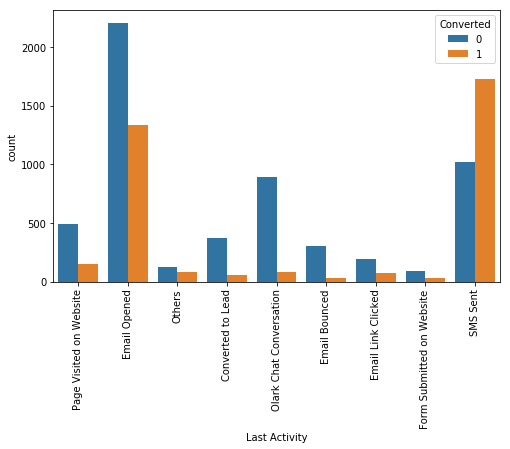

In [59]:
countplt(lead_score['Last Activity'])

#### Analysis-
#### 1. This variable tells us that what was the last activity of the leads
#### 2. Email opened and SMS Sent was the higest counts of leads and the conversion ratio is also good 
#### 3. SMS sent conversion ratio is good compare to other convertion rate
#### 4. Email and SMS are the best way of approaching to the users

### 4.6 Specialization

In [60]:
lead_score['Specialization'].value_counts(dropna=False)

Specialization_Management            4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

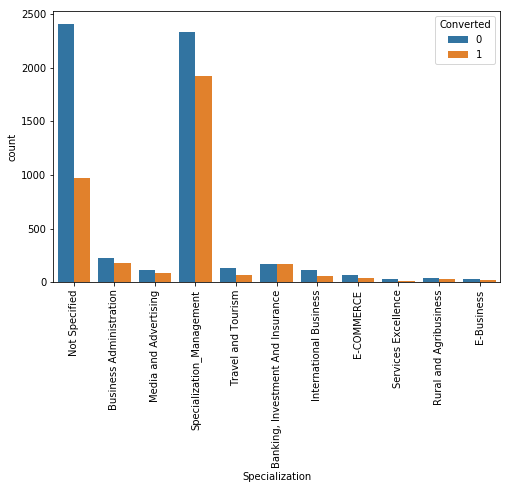

In [61]:
countplt(lead_score['Specialization'])

#### Analysis-
#### 1. Most of the leads are either from specialization management background or not specified(may be the graduation student)
#### 2. for Specialization_management conversion ratio  of leads are also good compare to any other value.
#### 3. All over to improve, We can provide some offers to Not specified category to get more number of converted leads

### 4.7 What is your current occupation

In [62]:
lead_score['What is your current occupation'].value_counts(dropna= False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

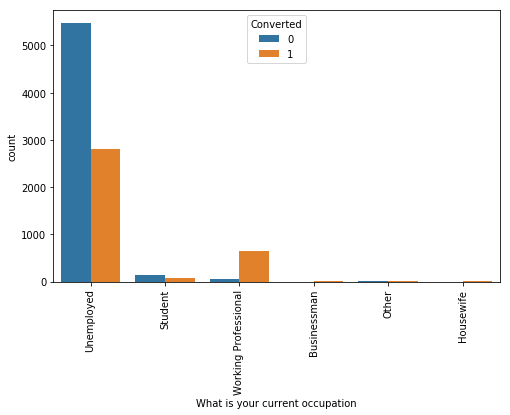

In [63]:
countplt(lead_score['What is your current occupation'])

#### Analysis-
#### 1. Most of the leads are from unemplyed candidates, who probably looking for better opertunity to get into.
#### 2. Working professional conversion is ok
#### 3. All together we need to focus on unemployed candidates

### 4.8 Tags

In [64]:
lead_score['Tags'].value_counts(dropna=False)

Not Specified                          3353
Will revert after reading the email    2072
Other Tags                             1722
Ringing                                1203
Positive other Tag                      890
Name: Tags, dtype: int64

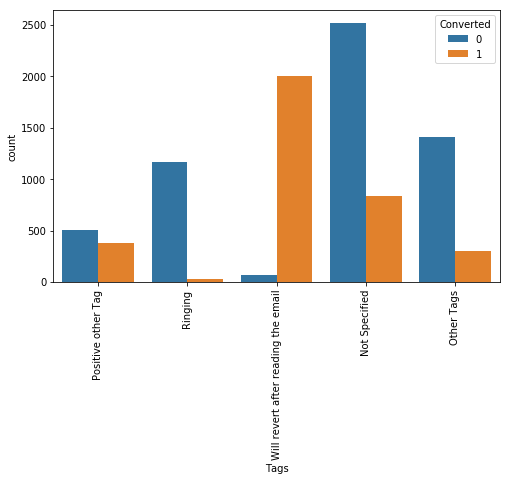

In [65]:
countplt(lead_score['Tags'])

#### Analysis-
#### 1. The leads coming in non category are the higest number of counts in leads
#### 2. Will revert after reading the mail is having high conversion rate
#### 3. Other Tags and Ringing having good amount of leads but the conversion is not so good

### 4.9 A free copy of Mastering The Interview

In [66]:
lead_score['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

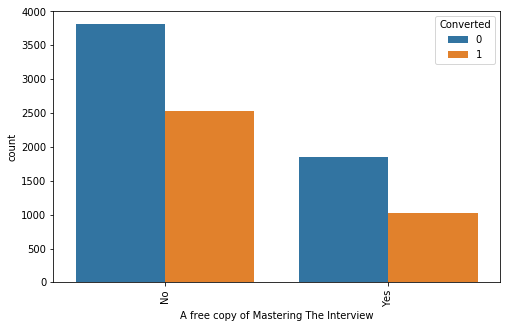

In [67]:
countplt(lead_score['A free copy of Mastering The Interview'])

#### Analysis-

#### leads dosnt want free copy of mastering the Interview, also with that the conversion rate is also high compared to who needs the copy of mastering

### 4.10 Last Notable Activity

In [68]:
lead_score['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
Resubscribed to emails             1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [69]:
lead_score['Last Notable Activity']= lead_score['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','View in browser link Clicked','Approached upfront','Form Submitted on Website','Resubscribed to emails','Email Received'],'Other notable activity')

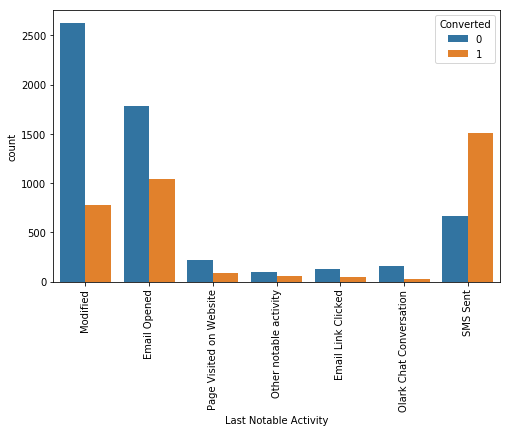

In [70]:
countplt(lead_score['Last Notable Activity'])

#### Analysis-
#### 1. Modified is having the higest no. of leads, with second is Email opened
#### 2. SMS sent is having higest number of conversion rate

### Imbalance Data Categorical

### 4.11 Search

In [71]:
lead_score['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

### 4.12 Magzine

In [73]:
lead_score['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

### 4.13 X Education Forums

In [75]:
lead_score['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

### 4.14 Newspaper

In [77]:
lead_score['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

### 4.15 Digital Advertisement

In [79]:
lead_score['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

### 4.16 Through Recommendations

In [81]:
lead_score['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

### 4.17 Receive More Updates About Our Courses

In [83]:
lead_score['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

### 4.18 Update me on Supply Chain Content

In [85]:
lead_score['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

### 4.19 Get updates on DM Content

In [87]:
lead_score['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

### 4.20 I agree to pay the amount through cheque

In [89]:
lead_score['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

### 4.21 Newspaper Article

In [91]:
lead_score['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

#### Extended the Imbalance variables in the Imbalance list so that we can drop it together as these variables may effect our model and biased it.

In [92]:

Imbalance.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'])

In [93]:
Imbalance

['Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [94]:
lead_score.drop(Imbalance,1,inplace=True)

In [95]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
Tags                                      9240 non-null object
A free copy of Mastering The Interview    9240 non-null object
Last Notable Activity                     9240 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 938.5+ KB


### Analysis on Converted target variable

In [202]:
# Check the data that has converted values to 1
Converted = (sum(lead_score['Converted'])/len(lead_score['Converted'].index))*100
Converted

38.448844884488445

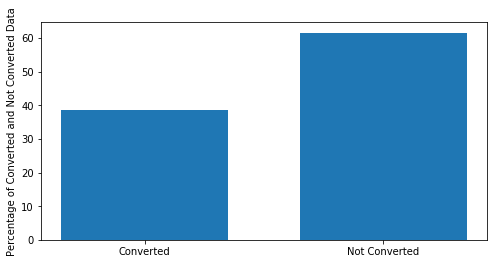

In [204]:
count_1=0
count_0=0

for i in lead_score.Converted.values:
    if i==1:
        count_1=count_1+1
    else:
        count_0=count_0+1

count_1_per= (count_1/(count_1+count_0))*100
count_0_per= (count_0/(count_1+count_0))*100

x=['Converted','Not Converted']
y=[count_1_per,count_0_per]

plt.figure(figsize=[8,4])
plt.bar(x,y,width=0.7)
plt.ylabel('Percentage of Converted and Not Converted Data')
plt.show()

In [197]:
# Some Function for Outlier treatment and box plot

def outlr(df):
    Q3 = df.quantile(0.99)
    lead_score = lead_score[(df <= Q3)]
    Q1 = df.quantile(0.01)
    lead_score = lead_score[(df >= Q1)]
    sns.boxplot(y=df)
    plt.show()
    
def boxplt(df):
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df)
    plt.show()

## 5. Numerical Analysis

#### Here we will see each of the Numerical variable and analyze it in depth for better understanding also we will look for outliers if any and treat them.

### 5.1 TotalVisits

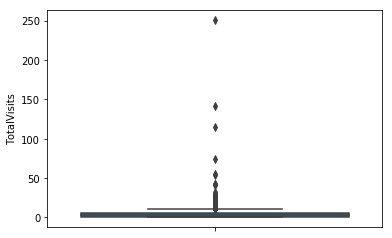

In [98]:
#Total Visits
#visualizing spread of variable

boxplt(lead_score['TotalVisits'])

#### Analysis- The most of the data points are lied in 0 line as median and certainly number of outliers that is clearly visible and we need to treat it

In [99]:
# Checking percentile value of the data
lead_score['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

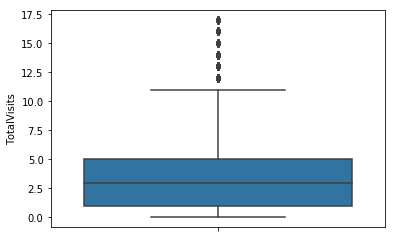

In [100]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = lead_score['TotalVisits'].quantile(0.99)
lead_score = lead_score[(lead_score['TotalVisits']<= Q3)]
Q1 = lead_score['TotalVisits'].quantile(0.01)
lead_score = lead_score[(lead_score['TotalVisits'] >= Q1)]
sns.boxplot(y=lead_score['TotalVisits'])
plt.show()

#### Analysis- Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

### 5.2 Total Time Spent on Website

In [101]:
lead_score['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9157.000000
mean      486.189036
std       547.695908
min         0.000000
5%          0.000000
25%        10.000000
50%       247.000000
75%       933.000000
90%      1379.000000
95%      1559.400000
99%      1839.440000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

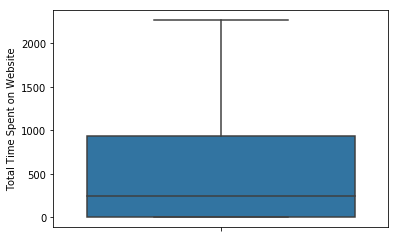

In [102]:
boxplt(lead_score['Total Time Spent on Website'])

#### Analysis- There are no outliers we see so we will keep it as it is

### 5.3 Page Views Per Visit

In [103]:
lead_score['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9157.000000
mean        2.332225
std         2.047285
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

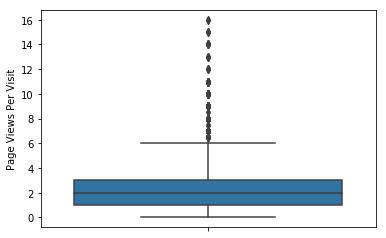

In [104]:
boxplt(lead_score['Page Views Per Visit'])

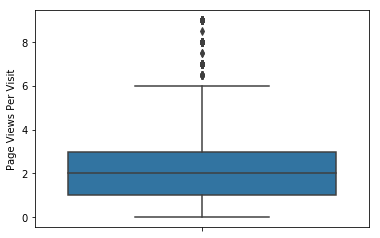

In [105]:
# Outlier Treatment

Q3 = lead_score['Page Views Per Visit'].quantile(0.99)
lead_score = lead_score[(lead_score['Page Views Per Visit']<= Q3)]
Q1 = lead_score['Page Views Per Visit'].quantile(0.01)
lead_score = lead_score[(lead_score['Page Views Per Visit'] >= Q1)]
sns.boxplot(y=lead_score['Page Views Per Visit'])
plt.show()

#### Analysis- For the variable Pages per visit after doing the outlier treatment we still see some of the outliers which will be finebut now the plot is quite more understandable compared to above.

## 6. Numerical variable analysis with the target value Converted

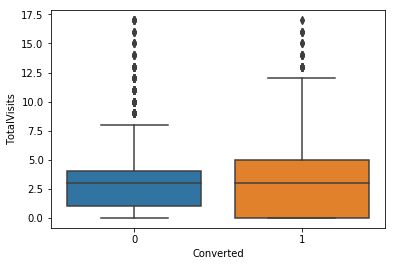

In [106]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_score)
plt.show()

#### Analysis-

#### 1. Median for converted and not converted leads are the close.
#### 2. Nothing conclusive can be said on the basis of Total Visits

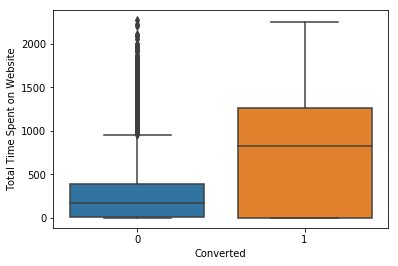

In [107]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=lead_score.Converted, y=lead_score['Total Time Spent on Website'])
plt.show()

#### Analysis-
#### 1. Leads spending more time on the website are more likely to be converted.
#### 2. Website should be made more engaging to make leads spend more time.

#### It’s the total visit by a lead on the website. So above plot says that the conversion ratio is good for the lead who visits the platform directly, its because the data in the website will be more related to the course.

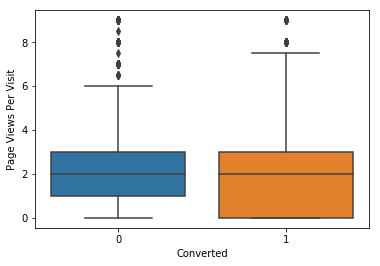

In [108]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=lead_score.Converted,y=lead_score['Page Views Per Visit'])
plt.show()

#### Analysis-
#### 1. Median for converted and unconverted leads is the same.
#### 2. Nothing can be said specifically for lead conversion from Page Views Per Visit

### Checking correlations of numeric values

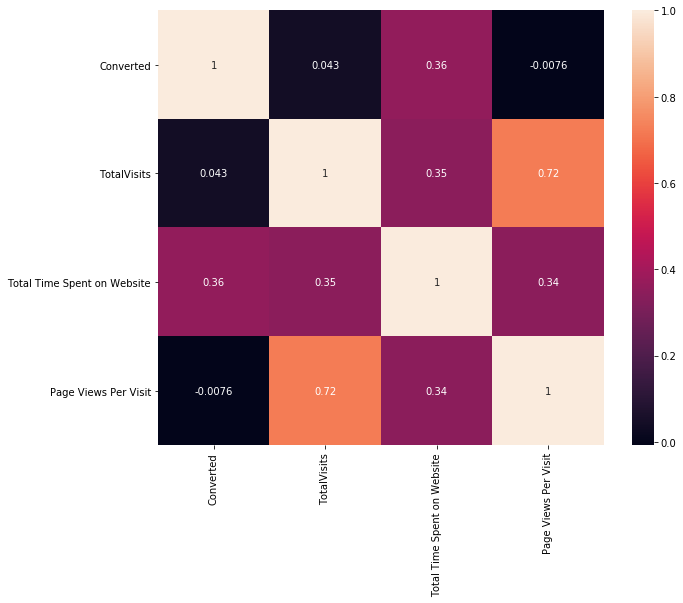

In [109]:

# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(lead_score[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(), annot=True)
plt.show()

In [110]:
#checking missing values in leftover columns/

round(100*(lead_score.isnull().sum()/len(lead_score.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## 7. Dummy Variable creation

In [111]:
cat_cols= lead_score.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [112]:
lead_score[cat_cols].head()

,Lead Origin,Lead Source,Do Not Email,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,Page Visited on Website,Not Specified,Unemployed,Positive other Tag,No,Modified
1,API,Organic Search,No,Email Opened,Not Specified,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,Others,Media and Advertising,Unemployed,Ringing,No,Modified
4,Landing Page Submission,Google,No,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,No,Modified


In [113]:
# Check for the variable having yes and No
yes_no_var=['Do Not Email','A free copy of Mastering The Interview']

In [114]:
def binarymap(x):
    return x.map({'Yes':1,'No':0})

In [115]:
lead_score[yes_no_var]=lead_score[yes_no_var].apply(binarymap)

In [116]:
# Get dummies and getting the first column with less values

dummy = pd.get_dummies(lead_score[['Lead Origin','What is your current occupation']], drop_first=True)

lead_score = pd.concat([lead_score,dummy],1)

In [117]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

lead_score.columns
rest_var=['Lead Source','Last Activity', 'Specialization','Tags','Last Notable Activity']

ls=pd.get_dummies(lead_score['Lead Source'],prefix='Lead Source')
ls=ls.drop(['Lead Source_Others'],axis=1)
lead_score=pd.concat([lead_score,ls],1)

In [118]:
la=pd.get_dummies(lead_score['Last Activity'],prefix='Last Activity')
la=la.drop(['Last Activity_Others'],axis=1)
lead_score=pd.concat([lead_score,la],1)

In [119]:
sp=pd.get_dummies(lead_score['Specialization'],prefix='Specialization')
sp=sp.drop(['Specialization_Services Excellence'],axis=1)
lead_score=pd.concat([lead_score,sp],1)


In [120]:
ta=pd.get_dummies(lead_score['Tags'],prefix='Tags')
ta=ta.drop(['Tags_Other Tags'],axis=1)
lead_score=pd.concat([lead_score,ta],1)

In [121]:
lna=pd.get_dummies(lead_score['Last Notable Activity'],prefix='Last Notable Activity')
lna=lna.drop(['Last Notable Activity_Other notable activity'],axis=1)
lead_score=pd.concat([lead_score,lna],1)

In [122]:
# Dropping the original columns after getting dummy variable
lead_score.drop(cat_cols,1,inplace = True)

In [123]:
lead_score.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Tags_Not Specified,Tags_Positive other Tag,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [124]:
lead_score.shape

(9090, 49)

## 8.Train and Split the data

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
y=lead_score['Converted']

In [127]:
X=lead_score.drop('Converted',axis=1)

In [128]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3, random_state=100)

In [129]:
y_test.shape

(2727,)

## 9. Scaling

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
scalar= StandardScaler()
num_cols=X_train.select_dtypes(include=['float64','int64']).columns
X_train[num_cols]=scalar.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Not Specified,Tags_Positive other Tag,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
302,1.336782,-0.428736,0.044021,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
6087,-1.094877,-0.887355,-1.206716,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1033,0.642022,-0.025151,1.477269,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7656,0.989402,-0.241619,2.014065,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3241,0.294642,0.897591,-0.492776,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


## 10. Model Building

### Using Statsmodels, Logisticregression and RFE

In [132]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [133]:
lr=LogisticRegression()
rfe=RFE(lr, n_features_to_select=None)
rfe=rfe.fit(X_train,y_train)

In [134]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('Lead Origin_Quick Add Form', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 10),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Lead Source_Direct Traffic', False, 5),
 ('Lead Source_Google', False, 9),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Reference', False, 13),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Social Media', False, 8),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Las

In [135]:
col=X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Quick Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Specialization_E-COMMERCE',
       'Specialization_Travel and Tourism', 'Tags_Positive other Tag',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [136]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Other', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_International Business',
       'Specialization_Media and Advertising', 'Specialization_Not Specified',
       'Specialization_Rural and Agribusiness',
       'Specialization_Specialization_Management', 'Tags_Not Specified',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [137]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [138]:
def vif_stat(df):
    vif=pd.DataFrame()
    vif['features']=df.columns
    vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

In [139]:
X_train_sm=sm.add_constant(X_train[col])
lr1=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=lr1.fit()
print(res.summary())
vif_stat(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1740.4
Date:                Mon, 11 Oct 2021   Deviance:                       3480.8
Time:                        09:24:33   Pearson chi2:                 9.98e+03
No. Iterations:                    21   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

,features,VIF
0,const,447.03
6,What is your current occupation_Unemployed,39.38
7,What is your current occupation_Working Profes...,31.28
21,Last Notable Activity_Email Opened,10.25
5,What is your current occupation_Student,10.04
24,Last Notable Activity_SMS Sent,9.43
22,Last Notable Activity_Modified,7.43
12,Last Activity_Email Opened,6.36
14,Last Activity_SMS Sent,6.23
13,Last Activity_Olark Chat Conversation,2.72


### Note- We will be dropping the variable on the basis of P- Value and VIF


In [140]:
X_train_sm=X_train_sm.drop('Lead Origin_Quick Add Form',axis=1)

X_train_sm=sm.add_constant(X_train_sm)
lr2=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=lr2.fit()
print(res.summary())
vif_stat(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1741.2
Date:                Mon, 11 Oct 2021   Deviance:                       3482.5
Time:                        09:24:33   Pearson chi2:                 1.00e+04
No. Iterations:                    21   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

,features,VIF
0,const,447.01
5,What is your current occupation_Unemployed,39.38
6,What is your current occupation_Working Profes...,31.28
20,Last Notable Activity_Email Opened,10.25
4,What is your current occupation_Student,10.04
23,Last Notable Activity_SMS Sent,9.43
21,Last Notable Activity_Modified,7.43
11,Last Activity_Email Opened,6.36
13,Last Activity_SMS Sent,6.23
12,Last Activity_Olark Chat Conversation,2.72


In [141]:
X_train_sm=X_train_sm.drop('What is your current occupation_Housewife',axis=1)

X_train_sm=sm.add_constant(X_train_sm)
lr3=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=lr3.fit()
print(res.summary())
vif_stat(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1742.8
Date:                Mon, 11 Oct 2021   Deviance:                       3485.5
Time:                        09:24:33   Pearson chi2:                 1.00e+04
No. Iterations:                     8   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

,features,VIF
0,const,289.60
4,What is your current occupation_Unemployed,24.76
5,What is your current occupation_Working Profes...,19.90
19,Last Notable Activity_Email Opened,10.25
22,Last Notable Activity_SMS Sent,9.43
20,Last Notable Activity_Modified,7.43
3,What is your current occupation_Student,6.66
10,Last Activity_Email Opened,6.36
12,Last Activity_SMS Sent,6.23
11,Last Activity_Olark Chat Conversation,2.72


In [142]:
X_train_sm=X_train_sm.drop('What is your current occupation_Working Professional',axis=1)

X_train_sm=sm.add_constant(X_train_sm)
lr4=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=lr4.fit()
print(res.summary())
vif_stat(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1742.8
Date:                Mon, 11 Oct 2021   Deviance:                       3485.5
Time:                        09:24:34   Pearson chi2:                 9.98e+03
No. Iterations:                     8   Covariance Type:             nonrobust
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8068     

,features,VIF
0,const,37.55
18,Last Notable Activity_Email Opened,10.24
21,Last Notable Activity_SMS Sent,9.43
19,Last Notable Activity_Modified,7.43
9,Last Activity_Email Opened,6.36
11,Last Activity_SMS Sent,6.23
10,Last Activity_Olark Chat Conversation,2.72
20,Last Notable Activity_Olark Chat Conversation,1.88
16,Tags_Will revert after reading the email,1.57
2,Lead Origin_Lead Add Form,1.56


In [143]:
X_train_sm=X_train_sm.drop('Last Notable Activity_Olark Chat Conversation',axis=1)

X_train_sm=sm.add_constant(X_train_sm)
lr5=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=lr5.fit()
print(res.summary())
vif_stat(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1743.7
Date:                Mon, 11 Oct 2021   Deviance:                       3487.5
Time:                        09:24:34   Pearson chi2:                 9.96e+03
No. Iterations:                     8   Covariance Type:             nonrobust
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9199      0.286   

,features,VIF
0,const,33.24
18,Last Notable Activity_Email Opened,7.90
20,Last Notable Activity_SMS Sent,7.46
9,Last Activity_Email Opened,5.96
11,Last Activity_SMS Sent,5.89
19,Last Notable Activity_Modified,4.84
10,Last Activity_Olark Chat Conversation,2.10
16,Tags_Will revert after reading the email,1.57
2,Lead Origin_Lead Add Form,1.56
4,What is your current occupation_Unemployed,1.54


In [144]:
X_train_sm=X_train_sm.drop('Last Notable Activity_Email Link Clicked',axis=1)

X_train_sm=sm.add_constant(X_train_sm)
lr6=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=lr6.fit()
print(res.summary())
vif_stat(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1744.5
Date:                Mon, 11 Oct 2021   Deviance:                       3488.9
Time:                        09:24:34   Pearson chi2:                 9.93e+03
No. Iterations:                     8   Covariance Type:             nonrobust
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.0203      0.274   

,features,VIF
0,const,29.68
17,Last Notable Activity_Email Opened,7.44
19,Last Notable Activity_SMS Sent,7.05
9,Last Activity_Email Opened,5.90
11,Last Activity_SMS Sent,5.84
18,Last Notable Activity_Modified,4.31
10,Last Activity_Olark Chat Conversation,2.02
16,Tags_Will revert after reading the email,1.57
2,Lead Origin_Lead Add Form,1.56
4,What is your current occupation_Unemployed,1.54


In [145]:
X_train_sm=X_train_sm.drop('Last Notable Activity_Email Opened',axis=1)

X_train_sm=sm.add_constant(X_train_sm)
lr7=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=lr7.fit()
print(res.summary())
vif_stat(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1745.0
Date:                Mon, 11 Oct 2021   Deviance:                       3490.0
Time:                        09:24:34   Pearson chi2:                 9.81e+03
No. Iterations:                     8   Covariance Type:             nonrobust
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.1022      0.264   

,features,VIF
0,const,26.97
11,Last Activity_SMS Sent,5.40
18,Last Notable Activity_SMS Sent,5.30
9,Last Activity_Email Opened,2.64
17,Last Notable Activity_Modified,2.10
10,Last Activity_Olark Chat Conversation,1.94
16,Tags_Will revert after reading the email,1.56
2,Lead Origin_Lead Add Form,1.55
4,What is your current occupation_Unemployed,1.54
5,Lead Source_Olark Chat,1.47


In [146]:
X_train_sm=X_train_sm.drop('Specialization_E-COMMERCE',axis=1)

X_train_sm=sm.add_constant(X_train_sm)
lr8=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=lr8.fit()
print(res.summary())
vif_stat(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6345
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1746.2
Date:                Mon, 11 Oct 2021   Deviance:                       3492.4
Time:                        09:24:35   Pearson chi2:                 9.75e+03
No. Iterations:                     8   Covariance Type:             nonrobust
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.0968      0.264   

,features,VIF
0,const,26.94
11,Last Activity_SMS Sent,5.40
17,Last Notable Activity_SMS Sent,5.30
9,Last Activity_Email Opened,2.64
16,Last Notable Activity_Modified,2.10
10,Last Activity_Olark Chat Conversation,1.94
15,Tags_Will revert after reading the email,1.56
4,What is your current occupation_Unemployed,1.54
2,Lead Origin_Lead Add Form,1.54
5,Lead Source_Olark Chat,1.47


In [147]:
X_train_sm=X_train_sm.drop('Specialization_Travel and Tourism',axis=1)

X_train_sm=sm.add_constant(X_train_sm)
lr9=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=lr9.fit()
print(res.summary())
vif_stat(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1748.2
Date:                Mon, 11 Oct 2021   Deviance:                       3496.3
Time:                        09:24:35   Pearson chi2:                 9.76e+03
No. Iterations:                     8   Covariance Type:             nonrobust
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.0980      0.264   

,features,VIF
0,const,26.93
11,Last Activity_SMS Sent,5.40
16,Last Notable Activity_SMS Sent,5.30
9,Last Activity_Email Opened,2.63
15,Last Notable Activity_Modified,2.10
10,Last Activity_Olark Chat Conversation,1.94
14,Tags_Will revert after reading the email,1.56
4,What is your current occupation_Unemployed,1.54
2,Lead Origin_Lead Add Form,1.54
5,Lead Source_Olark Chat,1.47


In [148]:
X_train_sm=X_train_sm.drop('Last Activity_Converted to Lead',axis=1)

X_train_sm=sm.add_constant(X_train_sm)
lr10=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=lr10.fit()
print(res.summary())
vif_stat(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1750.2
Date:                Mon, 11 Oct 2021   Deviance:                       3500.3
Time:                        09:24:35   Pearson chi2:                 9.34e+03
No. Iterations:                     8   Covariance Type:             nonrobust
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.1676      0.262   

,features,VIF
0,const,25.94
15,Last Notable Activity_SMS Sent,5.20
10,Last Activity_SMS Sent,4.80
8,Last Activity_Email Opened,2.36
14,Last Notable Activity_Modified,1.96
9,Last Activity_Olark Chat Conversation,1.73
13,Tags_Will revert after reading the email,1.56
2,Lead Origin_Lead Add Form,1.54
4,What is your current occupation_Unemployed,1.54
5,Lead Source_Olark Chat,1.46


In [149]:
X_train_sm=X_train_sm.drop('Last Notable Activity_SMS Sent',axis=1)

X_train_sm=sm.add_constant(X_train_sm)
lr11=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=lr11.fit()
print(res.summary())
vif_stat(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1769.1
Date:                Mon, 11 Oct 2021   Deviance:                       3538.2
Time:                        09:24:35   Pearson chi2:                 8.69e+03
No. Iterations:                     8   Covariance Type:             nonrobust
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9237      0.259   

,features,VIF
0,const,25.13
8,Last Activity_Email Opened,2.24
10,Last Activity_SMS Sent,2.21
9,Last Activity_Olark Chat Conversation,1.72
13,Tags_Will revert after reading the email,1.55
4,What is your current occupation_Unemployed,1.54
2,Lead Origin_Lead Add Form,1.53
5,Lead Source_Olark Chat,1.46
14,Last Notable Activity_Modified,1.44
1,Total Time Spent on Website,1.33


#### We have now build the model and now we will proceed with the predection on the basis of the variable which we have selected

## 11.  Prediction and Checking Metrics for Train data

In [150]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.1015428 , 0.02055184, 0.14755513, ..., 0.16587739, 0.43157007,
       0.06872185])

#### So we have got the predicted value for training , now we need to assign these values to each individual lead

In [151]:
# Creating a dataframe
y_train_pred_final=pd.DataFrame({'custID':y_train.index,'converted':y_train.values,'converted_prob':y_train_pred})
y_train_pred_final.head()

,custID,converted,converted_prob
0,302,0,0.101543
1,6087,0,0.020552
2,1033,0,0.147555
3,7656,0,0.029348
4,3241,1,0.991241


In [152]:
# Set a threshold point to proceed further

y_train_pred_final['prediction']=y_train_pred_final.converted_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,custID,converted,converted_prob,prediction
0,302,0,0.101543,0
1,6087,0,0.020552,0
2,1033,0,0.147555,0
3,7656,0,0.029348,0
4,3241,1,0.991241,1


#### Lets Check the Metrices

In [153]:
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score,precision_recall_curve,recall_score,precision_score,roc_curve,roc_auc_score

In [154]:
# Confusion Metrics

confusion= confusion_matrix(y_train_pred_final.converted,y_train_pred_final.prediction)
confusion

array([[3701,  234],
       [ 454, 1974]], dtype=int64)

In [155]:
accuracy=accuracy_score(y_train_pred_final.converted,y_train_pred_final.prediction)
accuracy

0.8918749017758919

In [156]:
# Metrics beyond accuracy

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [157]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8130148270181219

In [158]:
# Let us calculate specificity
TN / float(TN+FP)

0.9405336721728081

In [159]:
# positive predictive value 
print (TP / float(TP+FP))

0.8940217391304348


In [160]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05946632782719187


In [161]:
# Negative predictive value
print (TN / float(TN+ FN))

0.890734055354994


### Plotting ROC Curve

In [162]:
def roc(actual,prob):
    fpr,tpr,thresholds=roc_curve(actual,prob,drop_intermediate=False)
    auc_score=roc_auc_score(actual,prob)
    plt.figure(figsize=[5,5])
    plt.plot(fpr,tpr,label='ROC Curve (area = %0.2f)' % auc_score )
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

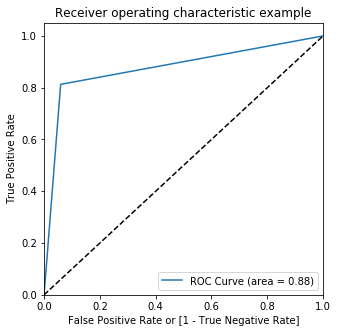

In [163]:
roc(y_train_pred_final.converted,y_train_pred_final.prediction)

#### An ROC curve demonstrates several things:

#### 1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
#### 2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
#### 3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

#### The above ROC curve have the area under curve is 0.88 which is pretty good, and the curve is towards the left handborder which is good.

#### Finding the optimal cutoff

In [164]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,custID,converted,converted_prob,prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,302,0,0.101543,0,1,1,0,0,0,0,0,0,0,0
1,6087,0,0.020552,0,1,0,0,0,0,0,0,0,0,0
2,1033,0,0.147555,0,1,1,0,0,0,0,0,0,0,0
3,7656,0,0.029348,0,1,0,0,0,0,0,0,0,0,0
4,3241,1,0.991241,1,1,1,1,1,1,1,1,1,1,1


In [165]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.757819  0.961697  0.632020
0.2   0.2  0.850071  0.911450  0.812198
0.3   0.3  0.875059  0.875618  0.874714
0.4   0.4  0.887003  0.843081  0.914104
0.5   0.5  0.891875  0.813015  0.940534
0.6   0.6  0.882445  0.757414  0.959593
0.7   0.7  0.871444  0.708402  0.972046
0.8   0.8  0.857929  0.659390  0.980432
0.9   0.9  0.838284  0.590198  0.991360


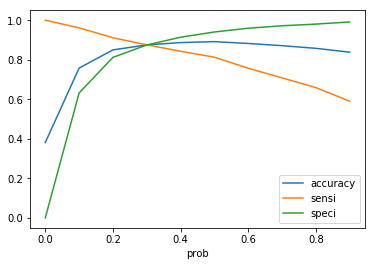

In [166]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [167]:
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,custID,converted,converted_prob,prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,302,0,0.101543,0,1,1,0,0,0,0,0,0,0,0,0
1,6087,0,0.020552,0,1,0,0,0,0,0,0,0,0,0,0
2,1033,0,0.147555,0,1,1,0,0,0,0,0,0,0,0,0
3,7656,0,0.029348,0,1,0,0,0,0,0,0,0,0,0,0
4,3241,1,0.991241,1,1,1,1,1,1,1,1,1,1,1,1


In [168]:
y_train_pred_final['lead_score']=y_train_pred_final.converted_prob.map(lambda x: round(x*100))
y_train_pred_final[['custID','converted','converted_prob','final_predicted','lead_score']].head()

,custID,converted,converted_prob,final_predicted,lead_score
0,302,0,0.101543,0,10
1,6087,0,0.020552,0,2
2,1033,0,0.147555,0,15
3,7656,0,0.029348,0,3
4,3241,1,0.991241,1,99


In [169]:
confusion2 = confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion2

array([[3442,  493],
       [ 302, 2126]], dtype=int64)

In [170]:
accuracy2=accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted )
accuracy2

0.875058934464875

In [171]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [172]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8756177924217463

In [173]:
# Let us calculate specificity
TN / float(TN+FP)

0.8747141041931386

In [174]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/ float(TN+FP)

0.1252858958068615

In [175]:
# Positive predictive value 
TP / float(TP+FP)

0.8117602138220695

In [176]:
# Negative predictive value
TN / float(TN+ FN)

0.9193376068376068


#### Observation: So as we can see above the model seems to be performing well. The ROC curve has a value of 0.88, which is very good.We have the following values for the Train Data:

#### Accuracy : 87.5%

#### Sensitivity : 87.5%

#### Specificity : 87.4%

#### Precision and Recall

#### Precision and Recall are the other metrices that we can verify as we need to be more precious on the score

In [177]:
confusion3=confusion_matrix(y_train_pred_final.converted,y_train_pred_final.final_predicted)
confusion3

array([[3442,  493],
       [ 302, 2126]], dtype=int64)

In [178]:
precision_score(y_train_pred_final.converted,y_train_pred_final.final_predicted)

0.8117602138220695

In [179]:
recall_score(y_train_pred_final.converted,y_train_pred_final.final_predicted)

0.8756177924217463

#### Precision and recall trade off

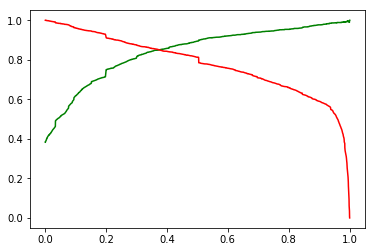

In [180]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Obeservation: The Precision and Recall score is quite good enough for the model which is as below.

#### Precision : 81.1 %

#### Recall : 87.5 %

## 12. Making Prediction on test set

In [181]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scalar.transform(X_test[num_cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Not Specified,Tags_Positive other Tag,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
6906,0.294642,1.919395,-0.133122,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1873,-0.400118,-0.546142,-0.133122,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
771,1.336782,-0.797465,2.550862,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4495,0.294642,-0.623190,0.940472,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
9061,-0.400118,2.392690,-0.133122,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [182]:
# We need to take the exact columns as per the final model data, hence 
col1=X_train_sm.drop('const',1)

In [183]:
X_test=X_test[col1.columns]

In [184]:
# we know that in stats model we need to add the constant
X_test_sm=sm.add_constant(X_test)

Making predection on Test Set

In [185]:
y_test_pred=res.predict(X_test_sm).values.reshape(-1)
y_test_pred

array([0.99700604, 0.32501474, 0.00407541, ..., 0.13692092, 0.03428493,
       0.31537065])

In [186]:
y_test_pred_final=pd.DataFrame({'custID':y_test.index,'converted':y_test.values,'converted_prob':y_test_pred})
y_test_pred_final.head()

,custID,converted,converted_prob
0,6906,1,0.997006
1,1873,0,0.325015
2,771,0,0.004075
3,4495,0,0.004895
4,9061,1,0.484827


In [187]:
# will add the lead score

y_test_pred_final['lead score']=y_test_pred_final.converted_prob.map(lambda x: round(x*100))
y_test_pred_final.head()


,custID,converted,converted_prob,lead score
0,6906,1,0.997006,100
1,1873,0,0.325015,33
2,771,0,0.004075,0
3,4495,0,0.004895,0
4,9061,1,0.484827,48


In [188]:
# As we know the cutoff point is of 0.3 so will apply that to get final predicted values

y_test_pred_final['final_predicted']=y_test_pred_final.converted_prob.map(lambda x: 1 if x>0.3 else 0)
y_test_pred_final.head()

,custID,converted,converted_prob,lead score,final_predicted
0,6906,1,0.997006,100,1
1,1873,0,0.325015,33,1
2,771,0,0.004075,0,0
3,4495,0,0.004895,0,0
4,9061,1,0.484827,48,1


In [189]:
# Confusion matric
confusion4= confusion_matrix(y_test_pred_final.converted,y_test_pred_final.final_predicted)
confusion4

array([[1468,  192],
       [ 125,  942]], dtype=int64)

In [190]:
# Accuracy
accuracy4=accuracy_score(y_test_pred_final.converted,y_test_pred_final.final_predicted)
accuracy4

0.8837550421708837

In [191]:
# Sensitivity
TP / float(TP+FN)

0.8756177924217463

In [192]:
# Specificity
TN / float(TN+FP)

0.8747141041931386

In [193]:
# Precision Score
precision_score(y_test_pred_final.converted,y_test_pred_final.final_predicted)

0.8306878306878307

In [194]:
# Recall Score
recall_score(y_test_pred_final.converted,y_test_pred_final.final_predicted)

0.8828491096532334

#### Observation: After running the model on the Test Data these are the metrices figures we calculated:

##### Accuracy : 88.3%

##### Sensitivity : 87.5%

##### Specificity : 87.4%

##### Precision : 83.0%

##### Recall : 88.2%

### Final Observation:

#### Let us compare the values obtained for Train & Test:

#### Train Data: 

##### Accuracy : 87.5%

##### Sensitivity : 87.5%

##### Specificity : 87.4%

##### Precision : 81.1%

##### Recall : 87.5%

#### Test Data: 

##### Accuracy : 88.3%

##### Sensitivity : 87.5%

##### Specificity : 87.4%

##### Precision : 83.0%

##### Recall : 88.2%

#### The Model seems to predict the Conversion Rate very well and we can proceed with the details and discuss with the CEO accordingly.